Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None
Sample Data:
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargin

<ipython-input-6-41b1400586bb>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Resume_str'].fillna('', inplace=True)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


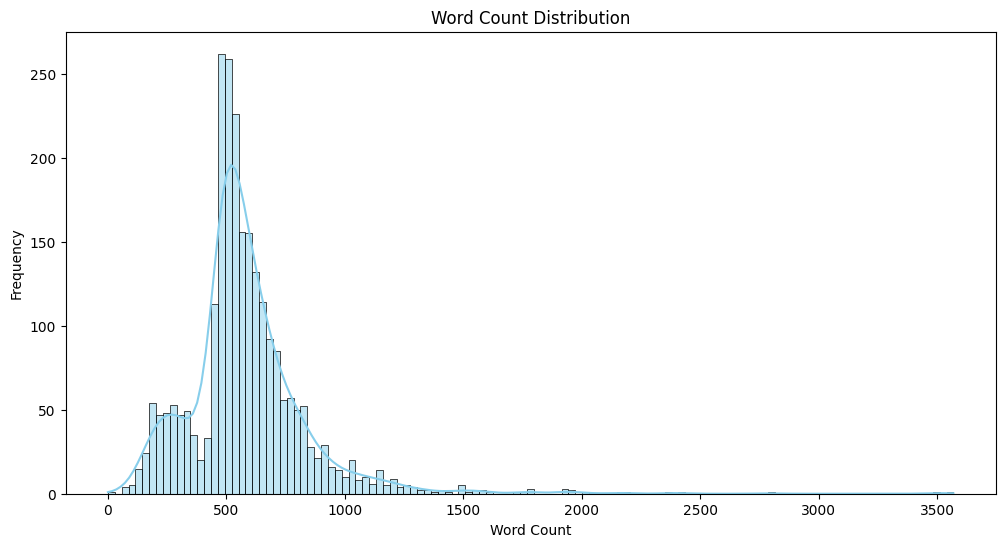

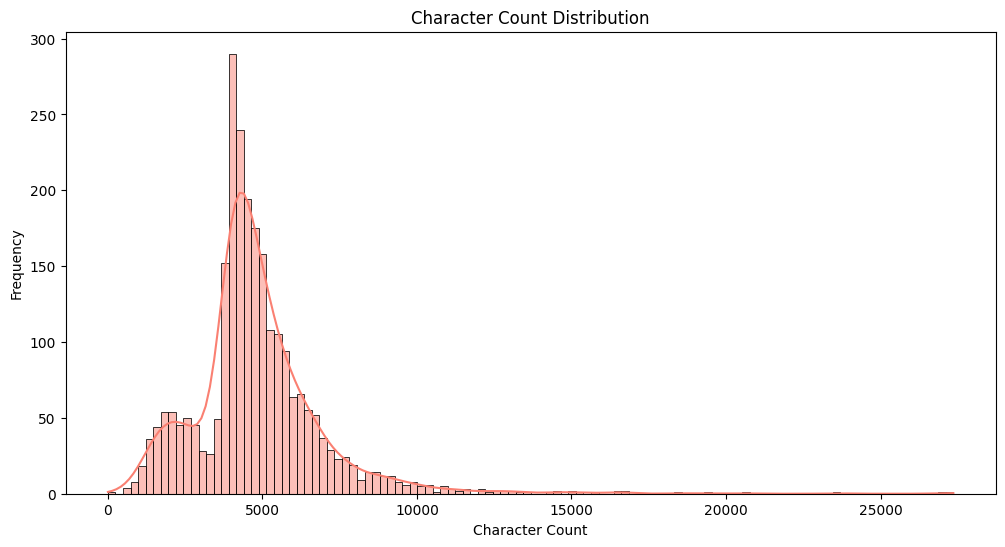

<ipython-input-6-41b1400586bb>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index, palette="viridis")


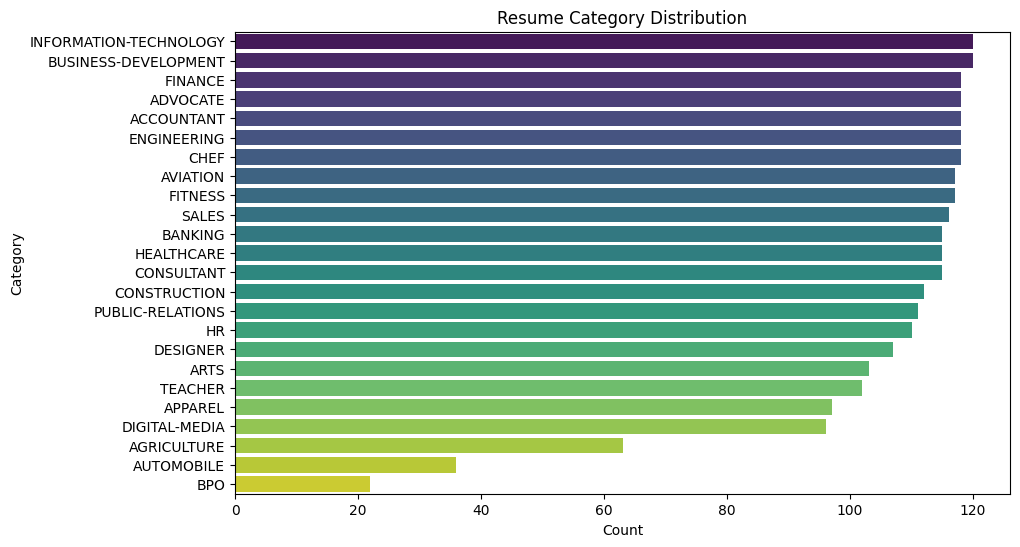

TF-IDF Feature Matrix:
    aa  aaa   ab  abc   ability      able  abreast  abroad   absence  abuse  \
0  0.0  0.0  0.0  0.0  0.000000  0.000000      0.0     0.0  0.048351    0.0   
1  0.0  0.0  0.0  0.0  0.000000  0.000000      0.0     0.0  0.000000    0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.024703      0.0     0.0  0.000000    0.0   
3  0.0  0.0  0.0  0.0  0.033114  0.000000      0.0     0.0  0.072216    0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.000000      0.0     0.0  0.000000    0.0   

   ...  yoga  york  young  youth  youtube  yoy   yr  zero  zone  zumba  
0  ...   0.0   0.0    0.0    0.0      0.0  0.0  0.0   0.0   0.0    0.0  
1  ...   0.0   0.0    0.0    0.0      0.0  0.0  0.0   0.0   0.0    0.0  
2  ...   0.0   0.0    0.0    0.0      0.0  0.0  0.0   0.0   0.0    0.0  
3  ...   0.0   0.0    0.0    0.0      0.0  0.0  0.0   0.0   0.0    0.0  
4  ...   0.0   0.0    0.0    0.0      0.0  0.0  0.0   0.0   0.0    0.0  

[5 rows x 5000 columns]
Final DataFrame with Engineered Feature

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv("Resume.csv")  # Replace with your file path

# Display basic info
print("Dataset Info:")
print(data.info())
print("Sample Data:")
print(data.head())

# Check for missing values
print("Missing values:", data.isnull().sum())

# Fill missing values if necessary (fill Resume_str with an empty string)
data['Resume_str'].fillna('', inplace=True)

# Initialize NLP tools
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text Preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the Resume_str column
data['processed_resume_text'] = data['Resume_str'].apply(preprocess_text)

# Feature Engineering
data['word_count'] = data['processed_resume_text'].apply(lambda x: len(x.split()))
data['char_count'] = data['processed_resume_text'].apply(len)

# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(data['word_count'], kde=True, color='skyblue')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['char_count'], kde=True, color='salmon')
plt.title("Character Count Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index, palette="viridis")
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features based on data size
X = tfidf.fit_transform(data['processed_resume_text']).toarray()

# Convert vectorized data back to DataFrame
tfidf_df = pd.DataFrame(X, columns=tfidf.get_feature_names_out())
print("TF-IDF Feature Matrix:")
print(tfidf_df.head())

# Optional: Add new features to the TF-IDF matrix
final_df = pd.concat([data[['ID', 'Category', 'word_count', 'char_count']], tfidf_df], axis=1)
print("Final DataFrame with Engineered Features:")
print(final_df.head())

# Extract Skills and Experience
def extract_skills(text):
    skills = ["Python", "Java", "C++", "Machine Learning", "Data Analysis", "SQL", "Project Management", "Communication"]  # Add relevant skills here
    extracted_skills = [skill for skill in skills if skill.lower() in text.lower()]
    return ', '.join(extracted_skills)

def extract_experience(text):
    experience_pattern = r'(\d+ years? of experience|\d+\+? years?)'  # Regular expression to capture experience
    experience_matches = re.findall(experience_pattern, text.lower())
    return ', '.join(experience_matches) if experience_matches else "Not specified"

data['Skills'] = data['Resume_str'].apply(extract_skills)
data['Experience'] = data['Resume_str'].apply(extract_experience)

# Display extracted Skills and Experience
print("Extracted Skills and Experience:")
print(data[['ID', 'Skills', 'Experience']].head())

# Add Skills and Experience to final_df
final_df['Skills'] = data['Skills']
final_df['Experience'] = data['Experience']

# Save the preprocessed data with new features to a new CSV
final_df.to_csv("preprocessed_resume_data_with_features.csv", index=False)
print("Data saved with additional skills and experience features.")
